Found 3200 images belonging to 1 classes.
Found 800 images belonging to 1 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9952 - loss: 0.0343 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 345ms/step


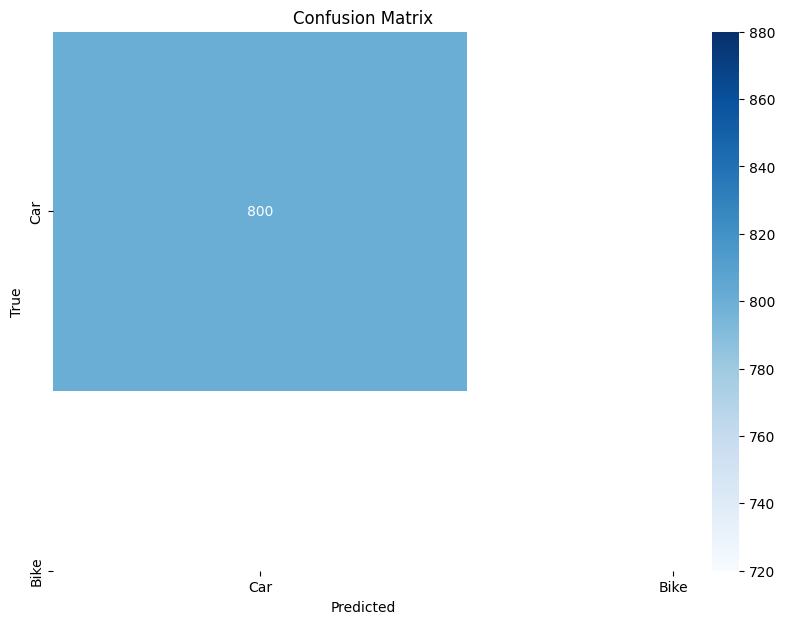

12/25 ━━━━━━━━━━━━━━━━━━━━ 3s 305ms/step

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 316ms/step


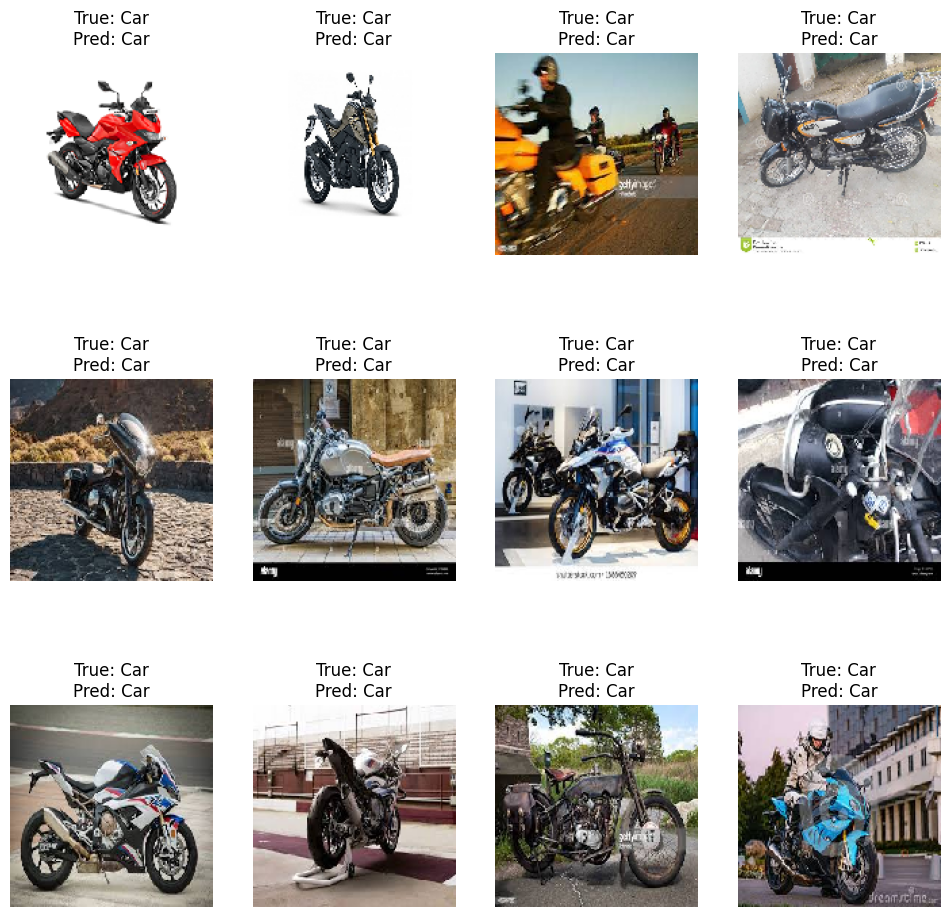

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
import os

# Ensure plots are shown in the notebook
%matplotlib inline

# Define the dataset path
dataset_path = '/kaggle/input/car-vs-bike-classification-dataset'

def convert_images_to_rgba(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            image_path = os.path.join(folder_path, filename)
            with Image.open(image_path) as img:
                img = img.convert('RGBA')  # Convert to RGBA
                img.save(image_path)

# Convert images in the dataset folder to RGBA
convert_images_to_rgba(dataset_path)

# Define image data generator for loading and preprocessing images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and preprocess the images
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    epochs=5,
    validation_data=val_data
)

# Evaluate the model
val_labels = val_data.classes
val_preds = model.predict(val_data)
val_preds = (val_preds > 0.5).astype(int).flatten()

# Compute the confusion matrix
conf_matrix = confusion_matrix(val_labels, val_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Car', 'Bike'], yticklabels=['Car', 'Bike'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot some correctly and incorrectly classified images
def plot_images(images, labels, predictions, class_names):
    plt.figure(figsize=(12, 12))
    for i in range(min(12, len(images))):  # Ensure we don't go out of bounds
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i])
        true_label = int(labels[i])  # Convert to int
        pred_label = int(predictions[i])  # Convert to int
        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
        plt.axis('off')
    plt.show()

# Retrieve images and labels from the validation set
val_images, val_labels = next(val_data)
val_preds = model.predict(val_data)
val_preds = (val_preds > 0.5).astype(int).flatten()

# Plot some examples
class_names = ['Car', 'Bike']
plot_images(val_images, val_labels, val_preds, class_names)


In [10]:
!pip install --upgrade tensorflow keras


^C


Found 3200 images belonging to 1 classes.
Found 800 images belonging to 1 classes.
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9550 - loss: 0.0373 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 1.0000 - loss: 2.6630e-32 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 1.0000 - loss: 1.7677e-32 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 1.0000 - loss: 2.6970e-33 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 1.0000 - loss: 3.2054e-32 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 1.0000 - loss: 4.0569e-32 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 1.0000 - loss: 3.3227e-32 - val_ac

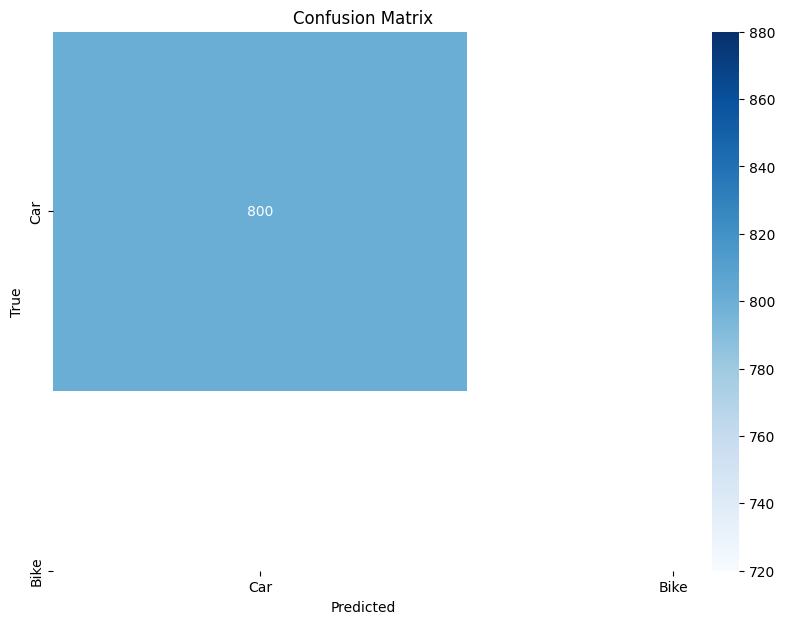

17/25 ━━━━━━━━━━━━━━━━━━━━ 2s 355ms/step

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 344ms/step


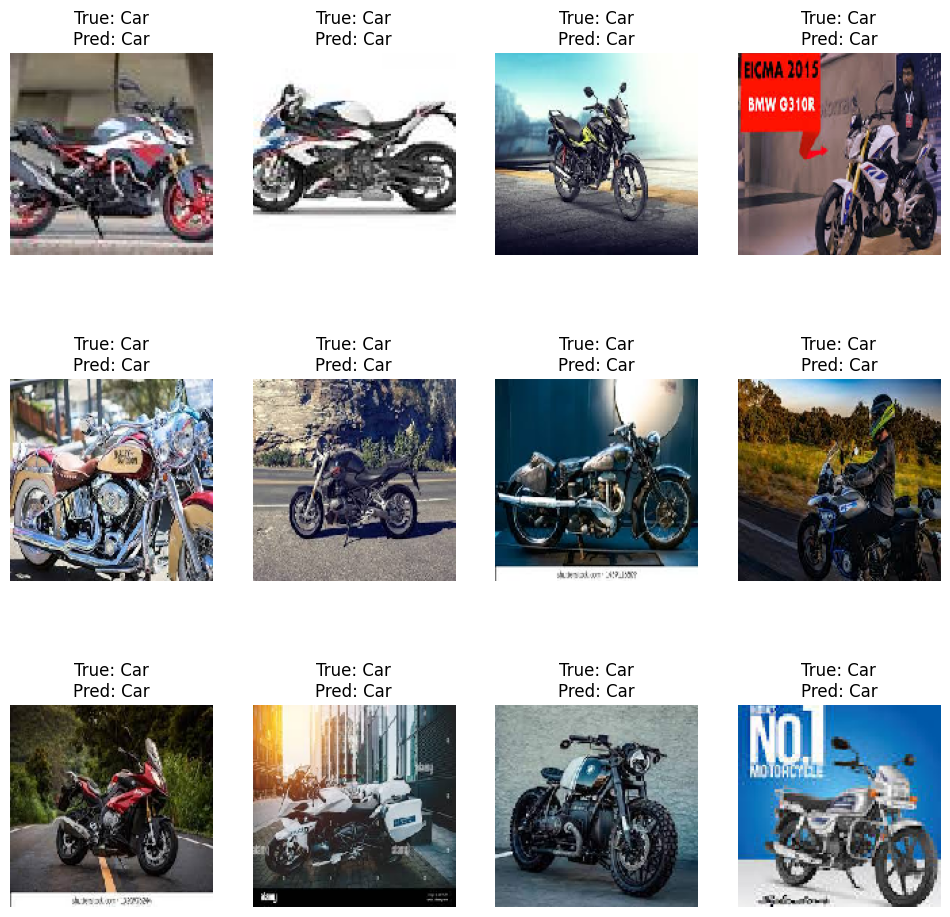

In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import os

# Ensure plots are shown in the notebook
%matplotlib inline

# Define the dataset path
dataset_path = '/kaggle/input/car-vs-bike-classification-dataset'

# Define image data generator for loading and preprocessing images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and preprocess the images
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Build the CNN model
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

# Evaluate the model
val_labels = val_data.classes
val_preds = model.predict(val_data)
val_preds = (val_preds > 0.5).astype(int).flatten()

# Compute the confusion matrix
conf_matrix = confusion_matrix(val_labels, val_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Car', 'Bike'], yticklabels=['Car', 'Bike'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot some correctly and incorrectly classified images
def plot_images(images, labels, predictions, class_names):
    plt.figure(figsize=(12, 12))
    for i in range(min(12, len(images))):  # Ensure we don't go out of bounds
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i])
        true_label = int(labels[i])  # Convert to int
        pred_label = int(predictions[i])  # Convert to int
        plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
        plt.axis('off')
    plt.show()

# Retrieve images and labels from the validation set
val_images, val_labels = next(val_data)
val_preds = model.predict(val_data)
val_preds = (val_preds > 0.5).astype(int).flatten()

# Plot some examples
class_names = ['Car', 'Bike']
plot_images(val_images, val_labels, val_preds, class_names)
